# Example notebook showing how to access gridded mooring data


In [20]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
from datetime import datetime

from netCDF4 import Dataset

from mycurrents import oceanmooring as om

In [45]:
%matplotlib notebook
#plt.rcParams['font.size']=14
#plt.rcParams['savefig.dpi'] = 150

In [22]:
# Temperature and ADCP files
Tfile = '../processed_data/RowleyShoals_Gridded_Mooring_T_SBE56.nc'
Tfile2 = '../processed_data/RowleyShoals_Gridded_Mooring_T_20sec.nc'

#adcpfile = '../processed_data/RowleyShoals2019_RDI_QAQC.nc'
adcpfile = '../processed_data/RowleyShoals2019_RDIADCPData_float64.nc'



In [23]:
# List all of the groups in the file using netcdf4 libarry
nc = Dataset(Tfile)
for gg in nc.groups:
    print(gg)
nc.close()

nc = Dataset(adcpfile)
for gg in nc.groups:
    print(gg)
nc.close()

T150
T200
T330
T330_RDI_75kHz_LR_16870
T200_RDI_75kHz_LR_24613
T150_RDI_150kHz_QM_11795


In [24]:
# Load the T150 data using the oceanmooring object

# temperature
T = om.from_netcdf(Tfile, 'Temperature',group='T150')

T.Z = T.Z - 140
T.positive = 'up'
T

OceanMooring(Nz=23, Nt=4271000)
	variable: Temperature [degC]

In [25]:
# northward velocity
v = om.from_netcdf(adcpfile, 'v',group='T150_RDI_150kHz_QM_11795')

# Flip the vertical axis
#v.zvar = -v.zvar
v.Z = v.Z - 140
v.positive = 'up'
v

OceanMooring(Nz=73, Nt=47111)
	variable: v [m/s]

In [26]:
# List all of the attributes and methods...
dir(v)

['Depth',
 'FileName',
 'FilePath',
 'InstrumentDepth',
 'Latitude',
 'Longitude',
 'Nt',
 'Nz',
 'Site',
 'StationID',
 'StationName',
 'VERBOSE',
 'X',
 'Y',
 'Z',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_dt',
 '_check_z',
 '_check_zunits',
 '_evenly_dist_data',
 '_get_tsec',
 '_interp_nearest',
 '_set_time',
 '_type',
 '_update_windowed_data',
 '_window_matrix',
 'autocorr',
 'basetime',
 'beam_angle',
 'beam_freq_khz',
 'beam_pattern',
 'bin1_dist_m',
 'bin_mapping',
 'blank_m',
 'cell_size_m',
 'clip',
 'concat',
 'config',
 'contourf',
 'coord',
 'coord_sys',
 'coordinates',
 'copy',
 'copy_like',
 'corr_threshold',
 'depthavg',
 'depthint',
 'desp

(-140, 0)

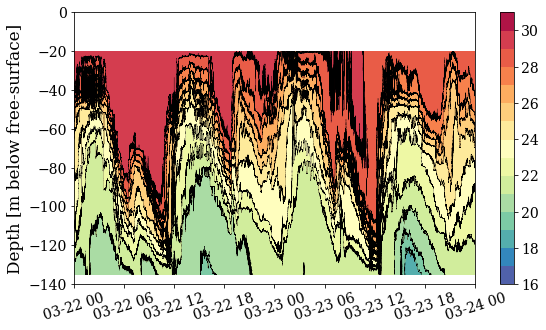

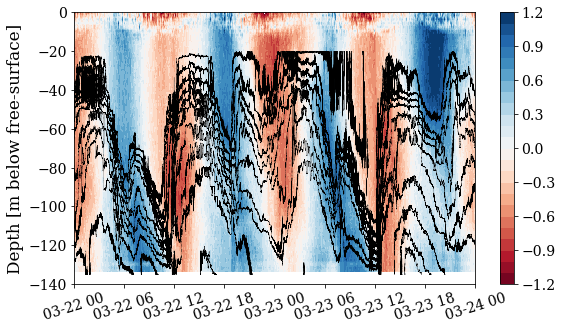

In [27]:
# Plot the data for a given time range
#v.get_tslice('2019-04-23 12:00:00','2019-04-23 12:30:00')

time0 =datetime(2019,3,22,0,0,0)
time1 =datetime(2019,3,24,0,0,0)
t0,t1 = v.get_tslice(time0,time1)
t0t,t1t = T.get_tslice(time0,time1)

#vlevs = np.arange(-1,1.1,0.1)
vlevs = np.arange(-1.2,1.3,0.1)

tlevs = np.arange(16,32,1)

fig = plt.figure(figsize=(9,5))
T.contourf(tlevs, filled=True, cbar=True, t0=t0t,t1=t1t,fig=fig,linewidths=0.1)
T.contourf(tlevs, filled=False, cbar=False, t0=t0t,t1=t1t,fig=fig,linewidths=0.2)
plt.ylim(-140,0)


fig = plt.figure(figsize=(9,5))
v.contourf(vlevs, cbar=True, t0=t0,t1=t1,fig=fig,cmap='RdBu')
T.contourf(tlevs, filled=False, cbar=False, t0=t0t,t1=t1t,fig=fig,linewidths=0.2)

plt.ylim(-140,0)

(-140, 0)

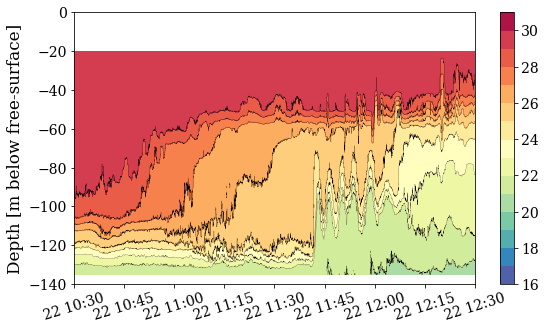

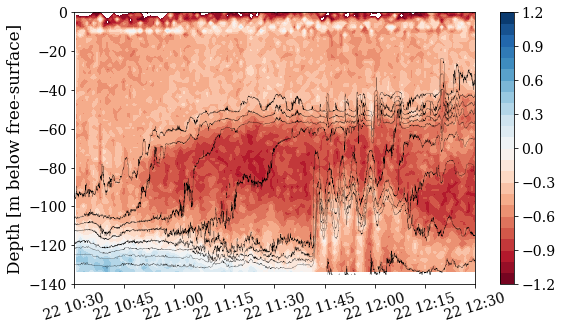

In [28]:
time0 =datetime(2019,3,22,10,30,0)
time1 =datetime(2019,3,22,12,30,0)
t0,t1 = v.get_tslice(time0,time1)
t0t,t1t = T.get_tslice(time0,time1)

#vlevs = np.arange(-1,1.1,0.1)
vlevs = np.arange(-1.2,1.3,0.1)

tlevs = np.arange(16,32,1)

fig = plt.figure(figsize=(9,5))
T.contourf(tlevs, filled=True, cbar=True, t0=t0t,t1=t1t,fig=fig,linewidths=0.1)
T.contourf(tlevs, filled=False, cbar=False, t0=t0t,t1=t1t,fig=fig,linewidths=0.2)


plt.ylim(-140,0)

fig = plt.figure(figsize=(9,5))
v.contourf(vlevs, cbar=True, t0=t0,t1=t1,fig=fig,cmap='RdBu')
T.contourf(tlevs, filled=False, cbar=False, t0=t0t,t1=t1t,fig=fig,linewidths=0.2)

plt.ylim(-140,0)

(-140, 0)

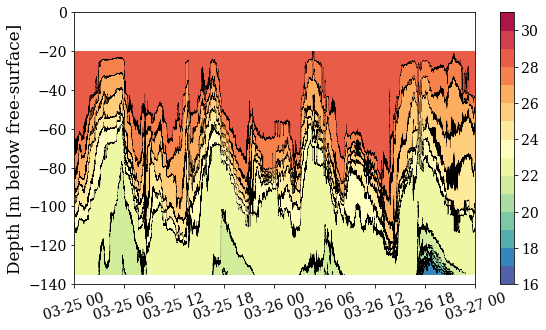

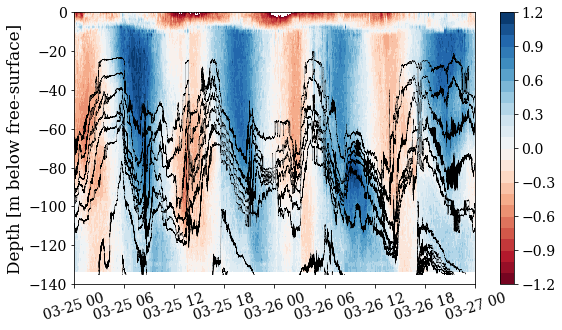

In [29]:
time0 =datetime(2019,3,25,0,0,0)
time1 =datetime(2019,3,27,0,0,0)
t0,t1 = v.get_tslice(time0,time1)
t0t,t1t = T.get_tslice(time0,time1)

#vlevs = np.arange(-1,1.1,0.1)
vlevs = np.arange(-1.2,1.3,0.1)

tlevs = np.arange(16,32,1)

fig = plt.figure(figsize=(9,5))
T.contourf(tlevs, filled=True, cbar=True, t0=t0t,t1=t1t,fig=fig,linewidths=0.1)
T.contourf(tlevs, filled=False, cbar=False, t0=t0t,t1=t1t,fig=fig,linewidths=0.2)


plt.ylim(-140,0)

fig = plt.figure(figsize=(9,5))
v.contourf(vlevs, cbar=True, t0=t0,t1=t1,fig=fig,cmap='RdBu')
T.contourf(tlevs, filled=False, cbar=False, t0=t0t,t1=t1t,fig=fig,linewidths=0.2)

plt.ylim(-140,0)

(-140, 0)

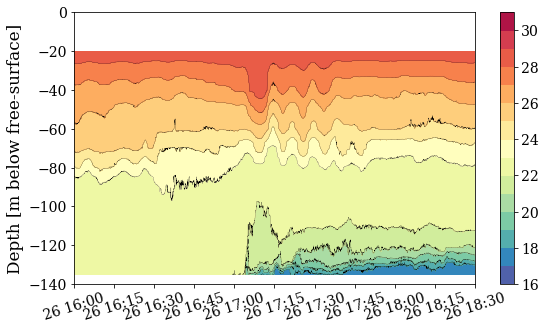

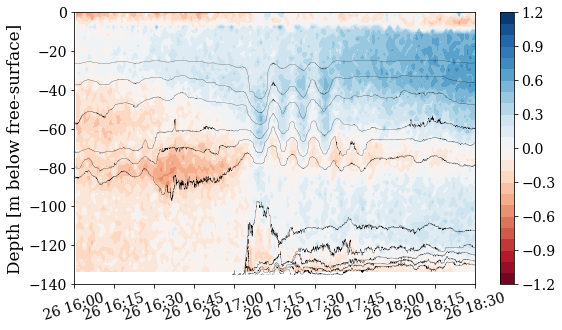

In [30]:
time0 =datetime(2019,3,26,16,0,0)
time1 =datetime(2019,3,26,18,30,0)
t0,t1 = v.get_tslice(time0,time1)
t0t,t1t = T.get_tslice(time0,time1)

#vlevs = np.arange(-1,1.1,0.1)
vlevs = np.arange(-1.2,1.3,0.1)

tlevs = np.arange(16,32,1)

fig = plt.figure(figsize=(9,5))
T.contourf(tlevs, filled=True, cbar=True, t0=t0t,t1=t1t,fig=fig,linewidths=0.1)
T.contourf(tlevs, filled=False, cbar=False, t0=t0t,t1=t1t,fig=fig,linewidths=0.2)


plt.ylim(-140,0)

fig = plt.figure(figsize=(9,5))
v.contourf(vlevs, cbar=True, t0=t0,t1=t1,fig=fig,cmap='RdBu')
T.contourf(tlevs, filled=False, cbar=False, t0=t0t,t1=t1t,fig=fig,linewidths=0.2)

plt.ylim(-140,0)

In [31]:
# Load the T330 data
# temperature
T330 = om.from_netcdf(Tfile2, 'Temperature',group='T330')

#T.Z = T.Z - 140
#T.positive = 'up'
T330
#T330.Z = T330.Z-330
T330.positive = 'down'
T330.Z

array([  9.5  ,  10.   ,  15.   ,  20.   ,  30.   ,  40.   ,  50.   ,
        60.   ,  70.   ,  80.   ,  90.   , 100.   , 110.   , 120.   ,
       130.   , 140.   , 149.5  , 160.   , 170.   , 180.   , 190.   ,
       200.   , 210.   , 220.   , 230.   , 240.   , 250.   , 260.   ,
       270.178, 290.   , 300.   ])

In [32]:
# northward velocity
v330 = om.from_netcdf(adcpfile, 'v',group='T330_RDI_75kHz_LR_16870')

# Flip the vertical axis
#v330.zvar = -v330.zvar
#v330.positive = 'up'
v330.Z = v330.Z[::-1]
v330

OceanMooring(Nz=160, Nt=72598)
	variable: v [m/s]

(<matplotlib.contour.QuadContourSet at 0x7f014be40d68>, None)

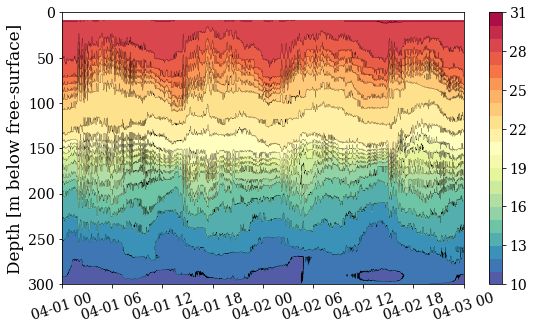

In [33]:
time0 =datetime(2019,4,1,0,0,0)
time1 =datetime(2019,4,3,0,0,0)
t0,t1 = v330.get_tslice(time0,time1)
t0t,t1t = T330.get_tslice(time0,time1)

#vlevs = np.arange(-1,1.1,0.1)
vlevs = np.arange(-0.6,0.7,0.1)

tlevs = np.arange(10,32,1)

fig = plt.figure(figsize=(9,5))
T330.contourf(tlevs, filled=True, cbar=True, t0=t0t,t1=t1t,fig=fig,linewidths=0.1)
T330.contourf(tlevs, filled=False, cbar=False, t0=t0t,t1=t1t,fig=fig,linewidths=0.2)


#plt.ylim(-330,0)


(<matplotlib.contour.QuadContourSet at 0x7f0156c8da58>, None)

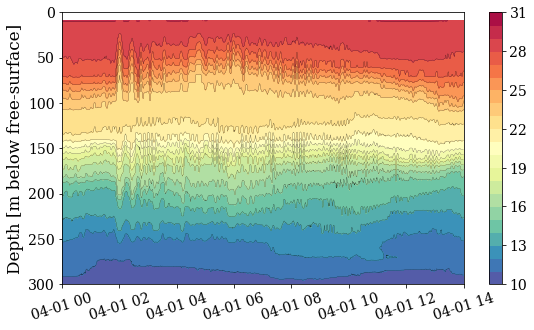

In [34]:
time0 =datetime(2019,4,1,0,0,0)
time1 =datetime(2019,4,1,14,0,0)
t0,t1 = v330.get_tslice(time0,time1)
t0t,t1t = T330.get_tslice(time0,time1)

#vlevs = np.arange(-1,1.1,0.1)
vlevs = np.arange(-0.6,0.7,0.1)

tlevs = np.arange(10,32,1)

fig = plt.figure(figsize=(9,5))
T330.contourf(tlevs, filled=True, cbar=True, t0=t0t,t1=t1t,fig=fig,linewidths=0.1)
T330.contourf(tlevs, filled=False, cbar=False, t0=t0t,t1=t1t,fig=fig,linewidths=0.2)

In [35]:
# temperature
T200 = om.from_netcdf(Tfile2, 'Temperature',group='T200')

#T.Z = T.Z - 140
#T.positive = 'up'
T200
#T330.Z = T330.Z-330
#T200.positive = 'down'
T200.Z

array([  2.9,   6. ,  10. ,  15. ,  20. ,  25. ,  30. ,  40. ,  50. ,
        60. ,  70. ,  80. ,  90. , 100. , 110. , 120. , 130. , 140. ,
       150. , 160. , 170. , 179. ])

(<matplotlib.contour.QuadContourSet at 0x7f0156c550b8>, None)

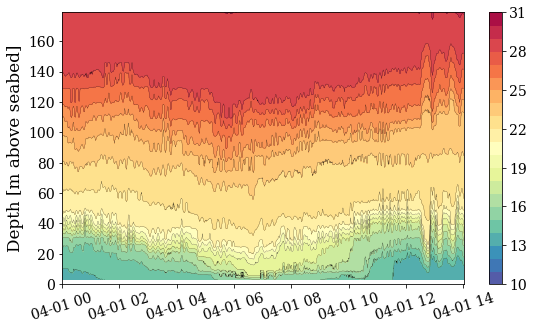

In [36]:
time0 =datetime(2019,4,1,0,0,0)
time1 =datetime(2019,4,1,14,0,0)
t0t,t1t = T200.get_tslice(time0,time1)


tlevs = np.arange(10,32,1)

fig = plt.figure(figsize=(9,5))
T200.contourf(tlevs, filled=True, cbar=True, t0=t0t,t1=t1t,fig=fig,linewidths=0.1)
T200.contourf(tlevs, filled=False, cbar=False, t0=t0t,t1=t1t,fig=fig,linewidths=0.2)

In [37]:
# Load some data as an xarray object

ds200 = xr.open_dataset(adcpfile, group='T150_RDI_150kHz_QM_11795')
ds200


<xarray.Dataset>
Dimensions:       (beam: 4, distance: 73, time: 47111)
Coordinates:
  * distance      (distance) float64 6.41 8.41 10.41 12.41 ... 146.4 148.4 150.4
  * beam          (beam) int64 1 2 3 4
  * time          (time) datetime64[ns] 2019-03-05 ... 2019-04-06T17:09:59.042499
Data variables:
    beamvel       (distance, beam, time) float32 ...
    percent_good  (distance, beam, time) float64 ...
    echo          (distance, beam, time) float64 ...
    corr          (distance, beam, time) float64 ...
    u             (distance, time) float64 ...
    v             (distance, time) float64 ...
    w             (distance, time) float64 ...
    uinst         (distance, time) float64 ...
    vinst         (distance, time) float64 ...
    winst         (distance, time) float64 ...
    errvel        (distance, time) float64 ...
    pressure      (time) float32 ...
    temperature   (time) float32 ...
    heading       (time) float32 ...
    pitch         (time) float32 ...
    roll

<IPython.core.display.Javascript object>


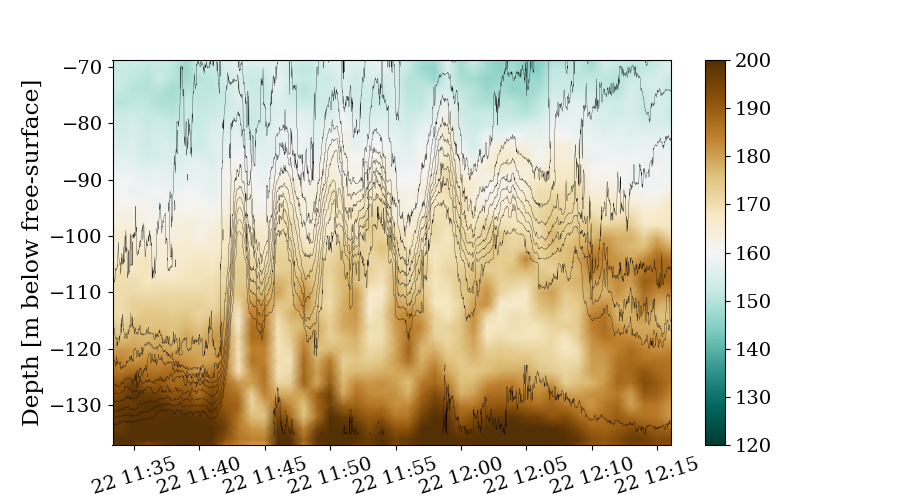

In [67]:
# Subset the data
time0 =datetime(2019,3,22,10,30,0)
time1 =datetime(2019,3,22,12,50,0)

dsc = ds200.sel(time=slice(time0,time1))

t0t,t1t = T.get_tslice(time0,time1)


fig = plt.figure(figsize=(9,5))

# Plot the echo intensity
plt.pcolormesh(dsc.time, dsc.Z, dsc.echo[:,1,:],cmap='BrBG_r', vmax=200,vmin=120, shading='gouraud')
T.contourf(tlevs, filled=False, cbar=False, t0=t0t,t1=t1t,fig=fig,linewidths=0.2)

plt.colorbar()

<IPython.core.display.Javascript object>


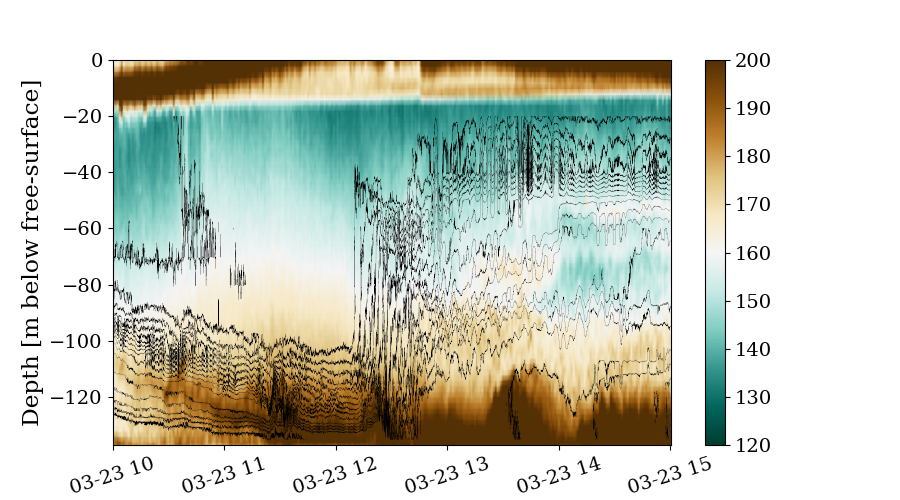

In [66]:
# Subset the data
time0 =datetime(2019,3,23,10,0,0)
time1 =datetime(2019,3,23,15,0,0)

dsc = ds200.sel(time=slice(time0,time1))

t0t,t1t = T.get_tslice(time0,time1)


fig = plt.figure(figsize=(9,5))

tlevs = np.arange(12,31,0.5)
# Plot the echo intensity
plt.pcolormesh(dsc.time, dsc.Z, dsc.echo[:,1,:],cmap='BrBG_r', vmax=200,vmin=120, shading='gouraud')
T.contourf(tlevs, filled=False, cbar=False, t0=t0t,t1=t1t,fig=fig,linewidths=0.1)

plt.colorbar()

In [65]:
plt.pcolormesh?